In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [8]:
# Load your CSV file
csv_path = r'C:\Users\disma\Desktop\lux_dev\DE\projects\w9\crypto_prices_202506040256.csv'
df = pd.read_csv(csv_path)

In [9]:
print(df.head)

<bound method NDFrame.head of          name symbol          price     market_cap  total_volume  \
0     Bitcoin    BTC  105631.000000  2099612457754   26103751572   
1    Ethereum    ETH    2598.990000   313833652899   16438620695   
2      Tether   USDT       1.001000   153397053750   45098335828   
3         BNB    BNB     661.880000    96558939438     721279682   
4      Solana    SOL     155.770000    81393824279    4008731664   
5        USDC   USDC       0.999811    61454274330    4196841006   
6    Dogecoin   DOGE       0.193662    28964589138    1077937098   
7        TRON    TRX       0.270743    25682981894     396194366   
8     Cardano    ADA       0.686491    24767909654     482000971   
9   Chainlink   LINK      14.140000     9290649994     354534531   
10  Avalanche   AVAX      21.170000     8923279574     358339072   
11    Stellar    XLM       0.273573     8530377218     185258109   
12   Litecoin    LTC      89.690000     6810199775     292503994   
13   Polkadot    D

In [10]:
# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [11]:
# Get unique coin symbols
symbols = df['symbol'].unique()

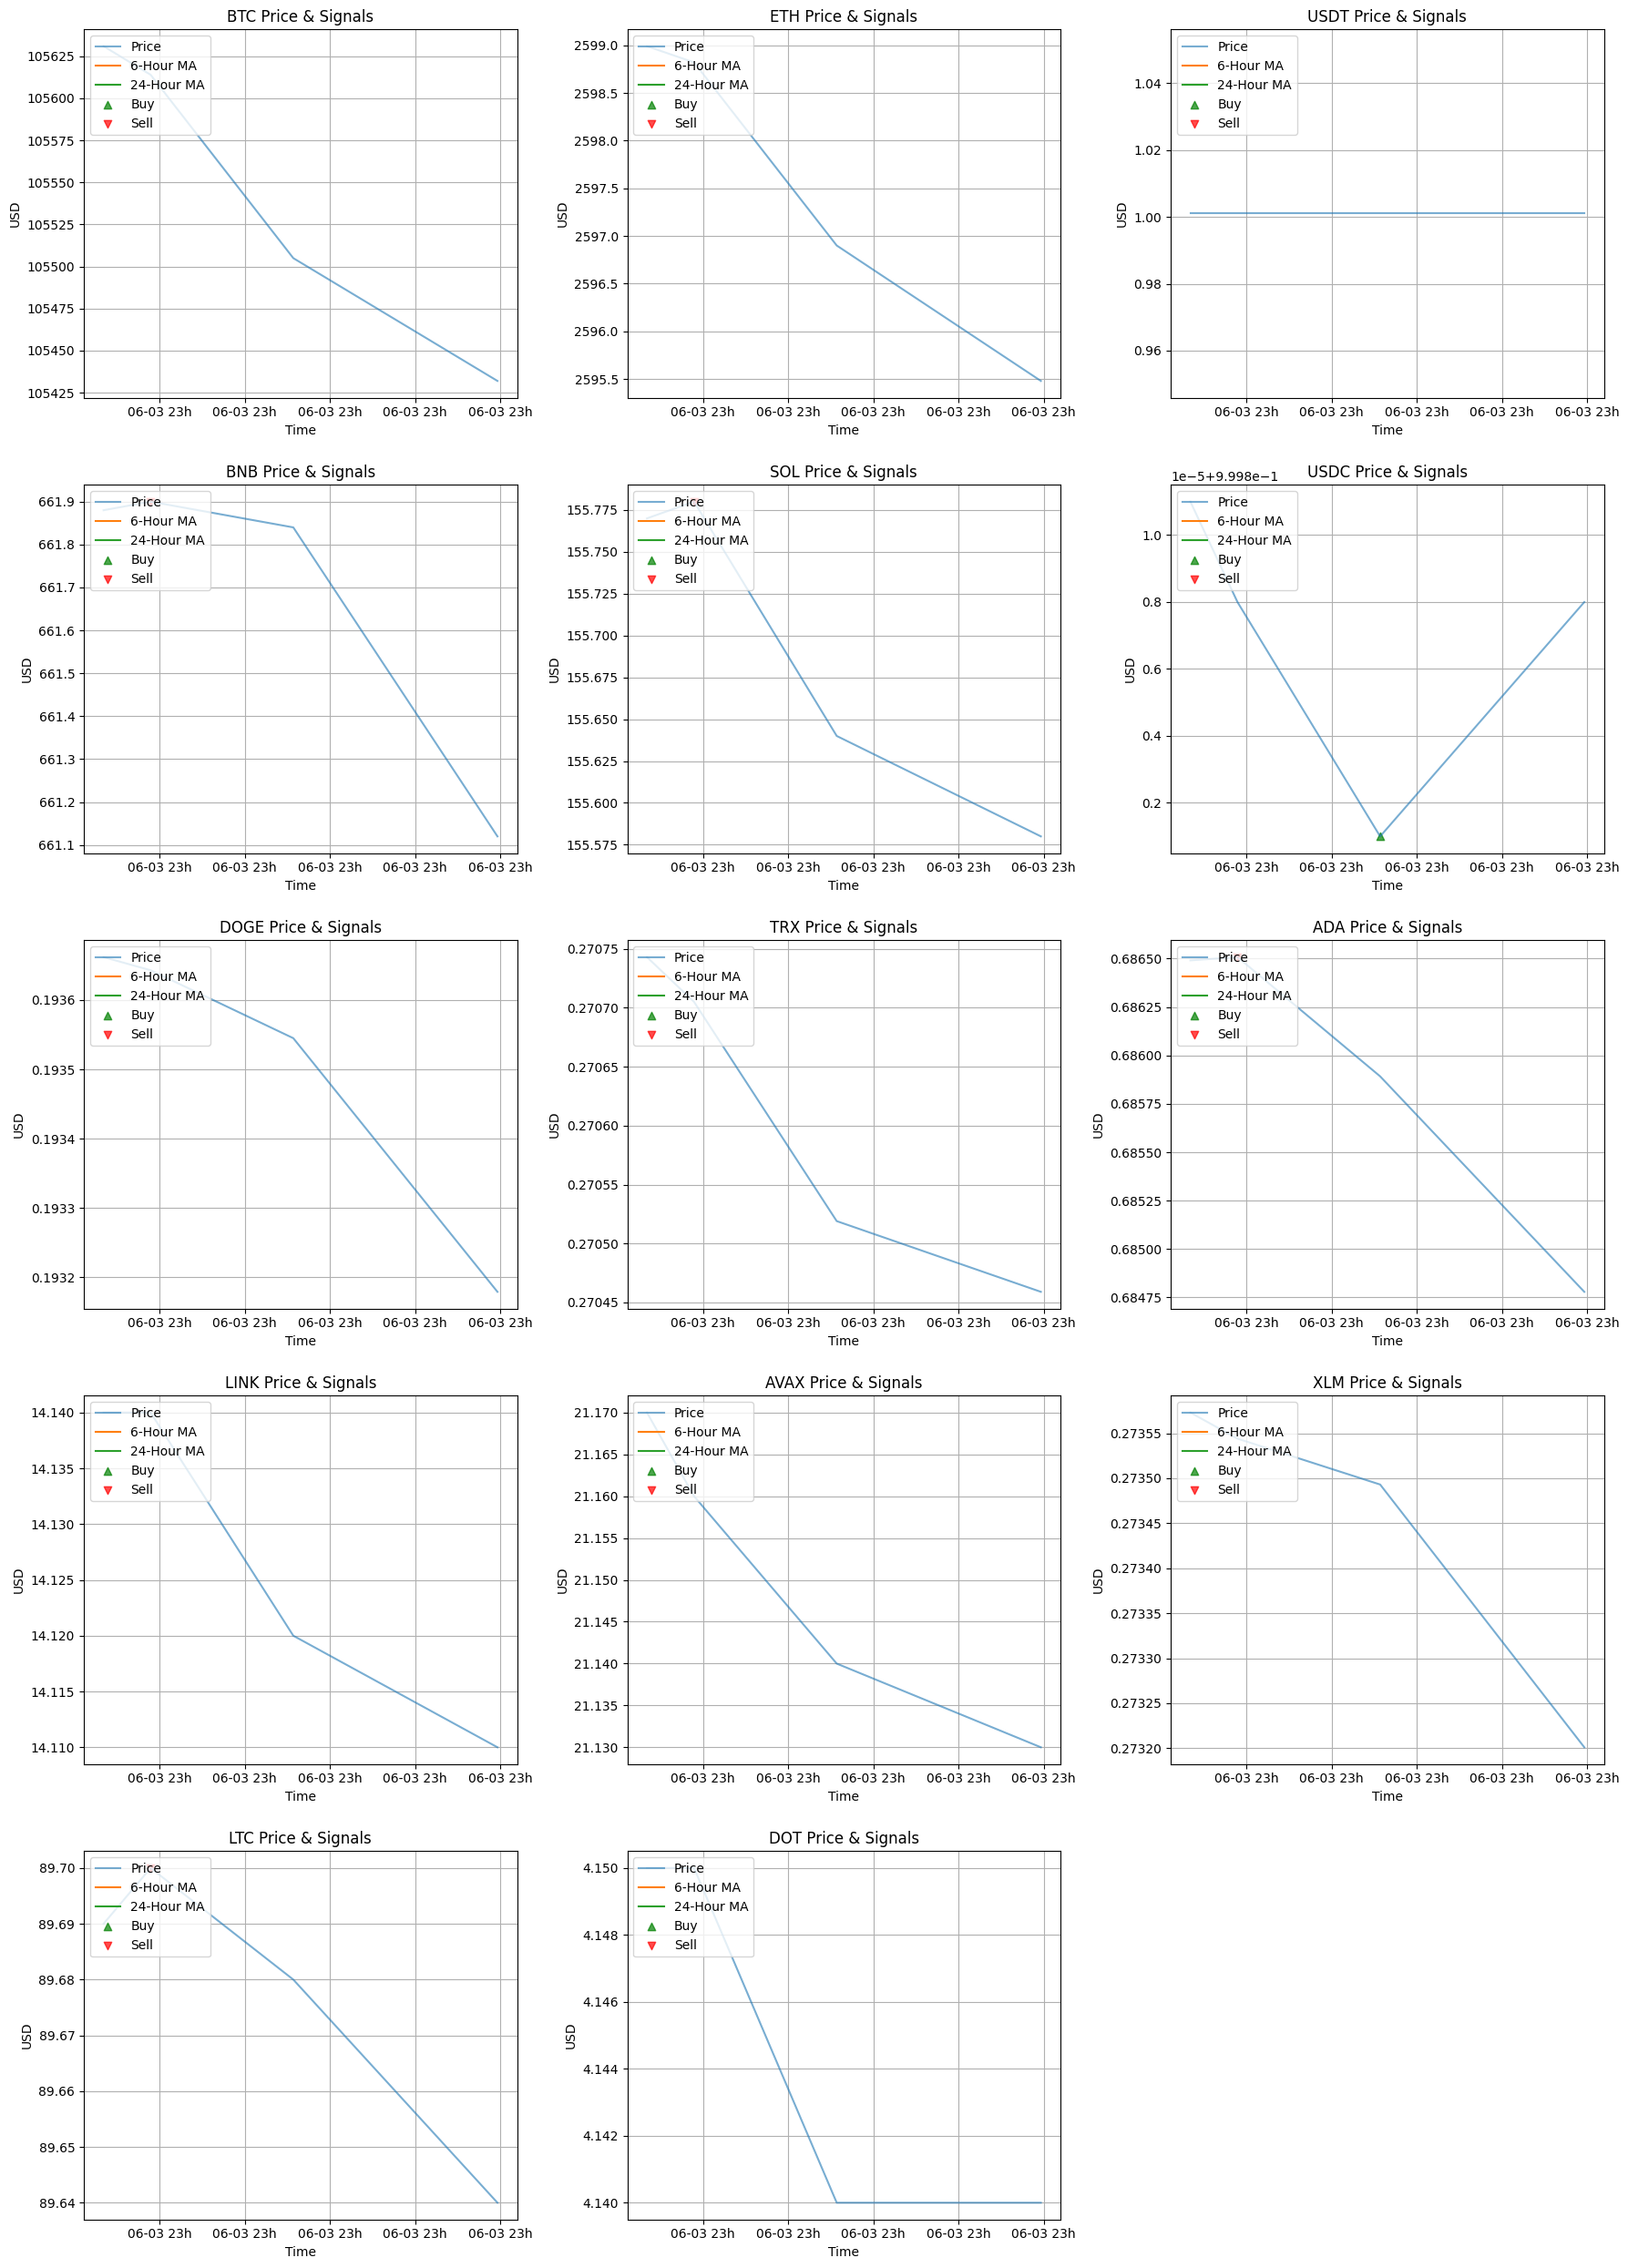

In [12]:

# Prepare plot grid (adjust rows and cols as needed)
rows = (len(symbols) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows), sharex=False)
axes = axes.flatten()

for i, symbol in enumerate(symbols):
    coin_df = df[df['symbol'] == symbol].copy()

    # Calculate moving averages
    coin_df['MA_6'] = coin_df['price'].rolling(window=6).mean()
    coin_df['MA_24'] = coin_df['price'].rolling(window=24).mean()

    # Detect local minima (buy) and maxima (sell)
    coin_df['min'] = coin_df['price'][(coin_df['price'].shift(1) > coin_df['price']) & (coin_df['price'].shift(-1) > coin_df['price'])]
    coin_df['max'] = coin_df['price'][(coin_df['price'].shift(1) < coin_df['price']) & (coin_df['price'].shift(-1) < coin_df['price'])]

    ax = axes[i]
    ax.plot(coin_df.index, coin_df['price'], label='Price', alpha=0.6)
    ax.plot(coin_df.index, coin_df['MA_6'], label='6-Hour MA')
    ax.plot(coin_df.index, coin_df['MA_24'], label='24-Hour MA')
    ax.scatter(coin_df.index, coin_df['min'], color='green', label='Buy', marker='^', alpha=0.7)
    ax.scatter(coin_df.index, coin_df['max'], color='red', label='Sell', marker='v', alpha=0.7)

    ax.set_title(f'{symbol} Price & Signals')
    ax.set_xlabel('Time')
    ax.set_ylabel('USD')
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %Hh'))
    ax.legend(loc='upper left')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
